<a href="https://colab.research.google.com/github/hasnat-abdullah/CSE465/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
pip install kaggle

In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hasnatabdullah","key":"3ef098b30758a86d5f32ac2b51f7d03d"}'}

In [0]:
!mkdir -p ~/.kaggle

In [0]:
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d START-UMD/gtd
!ls

 77% 22.0M/28.7M [00:00<00:00, 76.8MB/s]
100% 28.7M/28.7M [00:00<00:00, 113MB/s] 
gtd.zip  kaggle.json  sample_data


In [19]:
!unzip gtd.zip

Archive:  gtd.zip
  inflating: globalterrorismdb_0718dist.csv  


In [20]:
!ls

globalterrorismdb_0718dist.csv	gtd.zip  kaggle.json  sample_data


In [22]:
df = pd.read_csv("globalterrorismdb_0718dist.csv", encoding = "ISO-8859-1", low_memory = False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


# Columns


**eventid** A 12-digit Event ID system. First 8 numbers – date recorded “yyyymmdd”. Last 4 numbers – sequential case number for the given day (0001, 0002 etc).

**iyear** This field contains the year in which the incident occurred.

**imonth** This field contains the number of the month in which the incident occurred.

**iday** This field contains the numeric day of the month on which the incident occurred.

approxdate

**extended** 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less than 24 hours.

**resolution**

**country** This field identifies the country code

**country_txt** This field identifies the country or location where the incident occurred.

**region** This field identifies the region code based on 12 regions

**region_txt** This field identifies the region in which the incident occurred.

**provstate** Name (at the time of event) of the 1st order subnational administrative region

**city** Name of the city, village, or town in which the incident occurred

latitudeThe latitude of the city in which the event occurred.

longitudeThe longitude of the city in which the event occurred.

specificity

vicinity

location

summary

crit1

crit2

crit3

doubtterr

alternative

alternative_txt

multiple

**success** Success of a terrorist strike

**suicide** 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide attack.

**attacktype1** The general method of attack

**attacktype1_txt** The general method of attack and broad class of tactics used.

attacktype2

attacktype2_txt

attacktype3

attacktype3_txt

targtype1

**targtype1_txt** The general type of target/victim

targsubtype1

targsubtype1_txtThe more specific target category

corp1

**target1** The specific person, building, installation that was targeted and/or victimized

natlty1

natlty1_txtThe nationality of the target that was attacked

targtype2

targtype2_txt

targsubtype2

targsubtype2_txt

corp2

target2

natlty2

natlty2_txt

targtype3

targtype3_txt

targsubtype3

targsubtype3_txt

corp3

target3

natlty3

natlty3_txt

gnameThe name of the group that carried out the attack

gsubnameadditional details about group that carried out the attack like factions 

gname2

gsubname2

gname3

gsubname3

motive

guncertain1

guncertain2

guncertain3

individual

nperpsThe total number of terrorists participating in the incident

nperpcap

claimed

claimmode

claimmode_txt

claim2

claimmode2

claimmode2_txt

claim3

claimmode3

claimmode3_txt

compclaim

weaptype1

weaptype1_txtGeneral type of weapon used in the incident

weapsubtype1

weapsubtype1_txtMore specific value for most of the Weapon Types

weaptype2

weaptype2_txt

weapsubtype2

weapsubtype2_txt

weaptype3

weaptype3_txt

weapsubtype3

weapsubtype3_txt

weaptype4

weaptype4_txt

weapsubtype4

weapsubtype4_txt

weapdetail

nkillThe number of total confirmed fatalities for the incident

nkillusThe number of U.S. citizens who died as a result of the **incident**

# **Data cleaning**
Most of our data have NaN or 0's none of them are of our use, the next step is to clean our data and select only few columns from whole data that acually worth to me.

In [47]:

columns = ['iyear', 'imonth', 'iday', 'country_txt', 'city', 'latitude', 'longitude', 'success', 'attacktype1_txt', 'targtype1_txt', 'targsubtype1_txt']
df = df[columns]
df = df[(df[['iyear','imonth', 'iday']] != 0).all(axis=1)]
df.dropna()

,iyear,imonth,iday,country_txt,city,latitude,longitude,success,attacktype1_txt,targtype1_txt,targsubtype1_txt
0,1970,7,2,Dominican Republic,Santo Domingo,18.456792,-69.951164,1,Assassination,Private Citizens & Property,Named Civilian
5,1970,1,1,United States,Cairo,37.005105,-89.176269,1,Armed Assault,Police,"Police Building (headquarters, station, school)"
6,1970,1,2,Uruguay,Montevideo,-34.891151,-56.187214,0,Assassination,Police,Police Security Forces/Officers
7,1970,1,2,United States,Oakland,37.791927,-122.225906,1,Bombing/Explosion,Utilities,Electricity
8,1970,1,2,United States,Madison,43.076592,-89.412488,1,Facility/Infrastructure Attack,Military,Military Recruiting Station/Academy
...,...,...,...,...,...,...,...,...,...,...,...
181685,2017,12,31,Afghanistan,Maymana,35.921051,64.774544,1,Bombing/Explosion,Business,Retail/Grocery/Bakery
181686,2017,12,31,Somalia,Ceelka Geelow,2.359673,45.385034,1,Armed Assault,Military,Military Checkpoint
181687,2017,12,31,Syria,Jableh,35.407278,35.942679,1,Bombing/Explosion,Military,Military Barracks/Base/Headquarters/Checkpost
181688,2017,12,31,Philippines,Kubentog,6.900742,124.437908,1,Facility/Infrastructure Attack,Private Citizens & Property,House/Apartment/Residence


#**Data Visualization**

**Attacks in few countries since 1970**

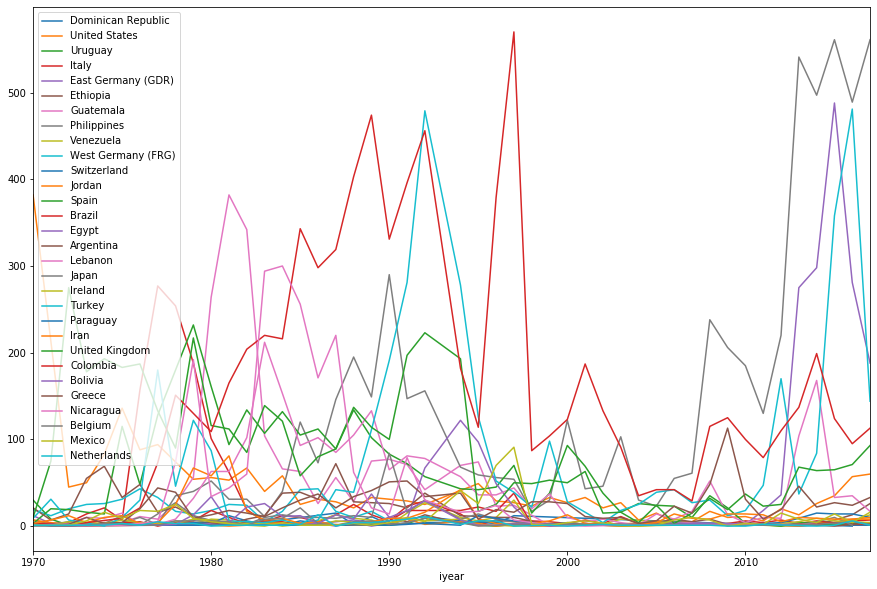

In [24]:
fig = plt.figure(figsize=(15,10))
countries = df[['country_txt']].drop_duplicates()
countries.values.tolist()
countries = [country for country_list in countries.values.tolist() for country in country_list]
for country in countries[:30]:
    country_data = df.loc[df['country_txt']==country]
    country_data.groupby('iyear').success.sum().plot(label=country)
plt.legend(loc='best')
plt.show()

**Top 10 countries who face the most terrorist attack**

In [31]:

total_attacks_in_each_country = df.groupby('country_txt').count()
countries_who_faced_max_attacks =  total_attacks_in_each_country.sort_values('success', ascending=False)[:10].index
countries_who_faced_max_attacks.values.tolist()
print("Countries who faced most terrorist attacks are: ")
for country in countries_who_faced_max_attacks:
    print(f"{country}")

Countries who faced most terrorist attacks are: 
Iraq
Pakistan
Afghanistan
India
Colombia
Philippines
Peru
El Salvador
United Kingdom
Turkey
